In [1]:
# Fill in your name using the format below and student ID number
your_name = "Suijkerbuijk, Pim"
student_id = "0895376"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
# physical_devices = tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

C:\Users\Pim\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Pim, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [7]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = './'

In [8]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [10]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

I0419 19:57:51.971808  4192 dataset.py:418] Data pickle file already exists and is up to date.


Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

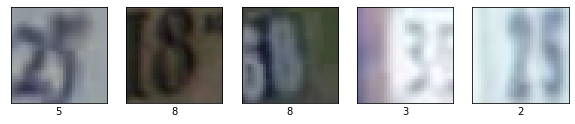

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [23]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model, model_from_json # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    # if a json description is available, load config and then weights
    if os.path.isfile(os.path.join(base_dir, name+'.json')):
      json_file = open(os.path.join(base_dir, name+'.json'), 'r')
      loaded_model_json = json_file.read()
      json_file.close()
      model = model_from_json(loaded_model_json)
      model.load_weights(os.path.join(base_dir, name+extension))
    # else just load the entire model from hdf5 file
    else:
      model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  path = os.path.join(base_dir, name+extension)
  model.save(path)
  size = os.path.getsize(path)
  # If model > 100MB, store the weights and architecture only.
  if size > 100*1024*1024:
    print("Model larger than 100MB, storing weights only.")
    model.save_weights(path)
    model_json = model.to_json()
    with open(os.path.join(base_dir, name+".json"), "w") as json_file:
        json_file.write(model_json)
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'**
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 3072)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
dense_45 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_46 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 7,409,546
Trainable params: 7,409,546
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.496892   0.17838

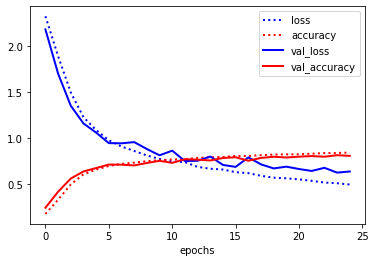

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=25, batch_size=256)

answer_q_1_1 = """Much parames needed to model the complex behaviour. Softmax layer needed to classify. 
               Combi showed good convergence but slow enough to not overfit. More layers/params/epochs 
               lead to overfit. Relu/adam/(batchsize) are the fastest converging activation/optimization
               options here. The model performs well, with the val_loss function starting to bottom out so no overfit 
               and a high accuracy of 0.84 considering no positional invariance."""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [17]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

Loading model from file
Success!
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_22 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_88 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_89 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_90 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_91 (Dense)             (None, 10)                1290      
Total params: 3,215,242
Trainable params: 3,215,242
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.476273  0.199830

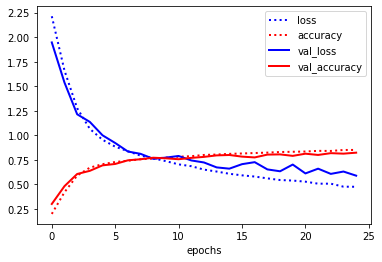

In [18]:
# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=25, batch_size=256)

answer_q_1_2 = """The tensor is transformed to a 32x32x1 tensor, so the input shape is transformed accordingly with
32x32x1 = 1024 input parameters. Min-max has already been applied. The model performs slighly better in both training 
and validation because colours are not a factor anymore, so the difference between images is less and more focus is on 
the shape of the numbers. The number of parameters is lower, but so is the input, which scales the same."""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_61 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_244 (Dense)            (None, 2048)              2099200   
_________________________________________________________________
dense_245 (Dense)            (None, 512)               1049088   
_________________________________________________________________
dense_246 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_247 (Dense)            (None, 10)                1290      
Total params: 3,215,242
Trainable params: 3,215,242
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.497852  0.219360

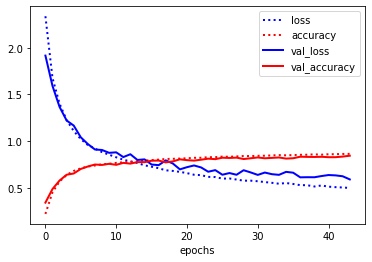

In [19]:
from keras import regularizers

def build_model_1_3():
    reg1 = regularizers.l2(0.00002)
    reg2 = regularizers.l2(0.0025)

    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(2048, activation='relu', kernel_regularizer = reg1))
    model.add(layers.Dense(512, activation='relu', kernel_regularizer = reg1))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer = reg2))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=44, batch_size=256)

answer_q_1_3 = """First tried to apply the same regularization to all layers. This overregularized, leading to a 
decrease in accuracy. Then tried regularization only on the last layer, which also has effect on backprop to the other 
layers. This worked well, then optimized the other layers with smaller lambda. Can run more epochs because 
less overfit. The model persoms/generalizes better, with much higher validation results. Val_loss not decreasing 
a lot anymore, but decreasing, so no overfit."""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
dropout_77 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_78 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_102 (Conv2D) 

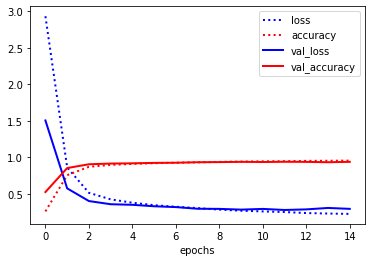

In [20]:
def build_model_2_1():
    reg0 = regularizers.l2(0.)
    reg1 = regularizers.l2(0.00001)
    reg2 = regularizers.l2(0.002)
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer = reg0, activation='relu', 
                            input_shape=(32, 32, 1), kernel_initializer='random_normal'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer = reg0, activation='relu',
                           kernel_initializer='random_normal'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer = reg0, activation='relu',
                           kernel_initializer='random_normal'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer = reg0, activation='relu',
                           kernel_initializer='random_normal'))
    model.add(layers.MaxPooling2D((2, 2))) 
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer = reg0, activation='relu',
                           kernel_initializer='random_normal'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer = reg0, activation='relu',
                           kernel_initializer='random_normal'))
    model.add(layers.MaxPooling2D((2, 2))) 
    
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer = reg1, activation='relu',
                           kernel_initializer='random_normal'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer = reg1, activation='relu',
                           kernel_initializer='random_normal'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer = reg1, activation='relu',
                           kernel_initializer='random_normal'))
    model.add(layers.MaxPooling2D((2, 2))) 
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='relu', kernel_regularizer = reg2, kernel_initializer='random_normal'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer = reg2, kernel_initializer='random_normal'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
    
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=15, batch_size=256)
answer_q_2_1 = """
Tried many optimizers/settings/architechtures.
Ended with default adam, stacked layers of conv layers with increasing number of filters to make model deeper,
which gave better results than a single layer with more filters, also keeps the number of activations roughly equal. 
'same' padding lowers information loss before pooling. Pooling helps with positional invariance. Dropout layers used to 
prevent random pattern learning so overfit. This makes the model bad at the startbut after 15 epochs val is lower than 
train, meaning train has learned sufficiently. Batchnormalization seemed to work worse, also with q2_2.
In combination with 3 levels of regularization, barely any overfit is observed. 
Good performance overall. Weights initialized with random_normal to reduce chance to get into local minimum."""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
dropout_56 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_57 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)  

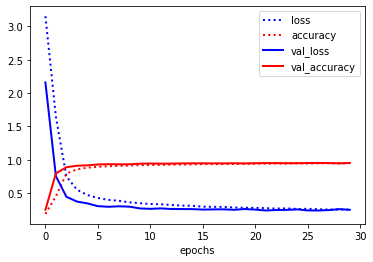

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
batch_size = 256
steps = int(X_train.shape[0] / batch_size)

train_datagen = ImageDataGenerator(
      rotation_range=0.05,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.0,
      zoom_range=0.1,
      fill_mode='nearest')

# load data 
it_train = train_datagen.flow(rgb2gray(X_train), y_train, batch_size=batch_size)

augmented_split = it_train, rgb2gray(X_val), y_val

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, generator = True, epochs=30, batch_size = None, steps_per_epoch = steps)

answer_q_2_2 = """Height/width shifts and small rotations/zooming work because not every image is centered/horizontal
perfectly or the same size. Shear/flips etc don't work because the images have the same orientation, so this would
create bad training data. Model able to generalize better, at cost of training performance, as training is randomly
augmented each epoch it trains slower. Val is not augmented. Model is not overfitting, performing well.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec

model_22 = load_model_from_file(base_dir, name = "model_2_2", extension='.h5')
model_22_eval = model_22.evaluate(rgb2gray(X_test), y_test)
test_accuracy_3_1 = model_22_eval[1]

y_pred = model_22.predict(rgb2gray(X_test))

In [ ]:
classes = {0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:9, 9:10}
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]

# Little messy, but what works works.....
misclassified_3s = []
for i in range(0, misclassified_samples.size):
    if classes[np.argmax(y_test[misclassified_samples[i]])] == 7:
        misclassified_3s += [misclassified_samples[i]]

def plot_confusion_matrix():
    cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    ax.set_xticklabels(list(classes.values()), rotation=45, ha="right")
    ax.set_yticklabels(list(classes.values()))
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(100):
        ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

def plot_misclassifications():
    # Visualize the (first five) misclassifications, together with the predicted and actual class
    fig, axes = plt.subplots(1, 15,  figsize=(10, 5))
    
    for nr, i in enumerate(misclassified_3s[:15]):
        axes[nr].imshow(X_test[i])
        axes[nr].set_xlabel("Predicted: %s" % (classes[np.argmax(y_pred[i])]))
        axes[nr].set_xticks(()), axes[nr].set_yticks(())
    
    gs = gridspec.GridSpec(3,5)
    for i in range(3):
        for j in range(5):
            k = i+j*3
            if k < len(axes):
                axes[k].set_position(gs[k].get_position(fig))

    plt.show()
    
plot_confusion_matrix()
plot_misclassifications()


answer_q_3_1 = """Accuracy on the test set is roughly the same as on train and val, amazing! 
To name a few bad classes: 1's are often mistaken to be 7's/4's, 2's to be 3's, 8's to be 5's/3's, 10's to be 1's. 
Those numbers look very alike, so not strange. What is interesting, is that 1 has much data and is predicted wrong often, 
which could mean that our model is "overtrained" to find 1 wrt the other data. Number 7 is inspected more closely.
A lot of the numbers are very noisy and even I find it very hard to make out what number they should be.
Others are in a strange font, or not even fully in the image. Multiple misclassifications also come from double/triple
numbers."""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [ ]:
# To ignore error caused by inactive filters
np.seterr(divide='ignore', invalid='ignore')

def my_3_2(layer_index):
    start = layer_index
    end = layer_index+1
    img_tensor = X_test[0]
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    img_tensor = rgb2gray(img_tensor)

    # Extracts the outputs of the layers:
    model = load_model_from_file(base_dir, name = "model_2_2", extension='.h5')
    layer_outputs = [layer.output for layer in model.layers]

    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    # one array per layer activation
    activations = activation_model.predict(img_tensor)

    images_per_row = 16

    layer_names = []
    for layer in model.layers:
        layer_names.append(layer.name)
        
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index + 1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

        plt.show()
     
    return plt
        
def plot_activations():
    # plot_activations() that returns the most interesting activations (feature maps)
    return my_3_2(0), my_3_2(4), my_3_2(6), my_3_2(8), my_3_2(14)

plot_activations()    
    
answer_q_3_2 = """In lower layers, bigger patterns are being learned, like the rounding of the 8. From the activations,
you can still make out the number, like in layer 1 or 5, so the model works good. The deeper you go, those patterns are 
broken up into smaller and more abstract parts (layer 7), which are learned in more filters. Because of this, 
and the lower resolution after pooling, it is increasingly hard to see what the model is learning from activations, 
for example in layer 15."""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpose the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [ ]:
import cv2

# layer 17 is last conv layer conv2d_80
# Basis taken from https://gist.github.com/RaphaelMeudec/e9a805fa82880876f8d89766f0690b54
def my_function(guided_grads = False):
    title_fill = ""
    # load model
    model = load_model_from_file(base_dir, name = "model_2_2", extension='.h5')
    
    # Undo the scaling performed before the assignment to be able to plot with normal ranged image
    color_img = 255 * X_test[0]
    color_img = color_img.astype(int)
    
    # Prep image so it is accepted by the model
    img = rgb2gray(X_test)[0]
    
    LAYER_NAME = 'conv2d_80'
    # It is an 8 (and also predits an 8), so index is 7 
    CLASS_INDEX = 7
    
    # Create a graph that outputs target convolution and output
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(LAYER_NAME).output, model.output])

    # Get the score for target class
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.array([img]))
        loss = predictions[:, CLASS_INDEX]

    # Extract filters and gradients
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    
    # If we use guided grads grads are filtered 
    if guided_grads:
        gate_f = tf.cast(output > 0, 'float32')
        gate_r = tf.cast(grads > 0, 'float32')
        grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads
        title_fill = "with guided backpropagation"        

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Build a ponderated map of filters according to gradients importance
    cam = np.ones(output.shape[0:2], dtype=np.float32)

    for index, w in enumerate(weights):
        cam += w * output[:, :, index]

    # Heatmap visualization
    cam = cv2.resize(cam.numpy(), (32, 32))
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    
    # No color conversion needed as original already RGB
    output_img = cv2.addWeighted(color_img.astype('uint8'), 1, cam, 0.5, 0)
    
    plt.title("Class activation map of last conv_layer " + title_fill)
    plt.imshow(output_img)
    
    plt.show()
    
    return plt
    
def plot_activation_map():
    # here because it is required
    my_function(guided_grads = False)  
    
def plot_3_3():
    # Uncomment to see the activations that contributed to the correct classification, called guided gradcam
    #my_function(guided_grads = True)
    
    # returns normal cam
    return my_function(guided_grads = False)

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.469295  0.583218  0.818063      0.690691
max  5.248506  0.935840  4.188462      0.833889
Answer is 497 characters long


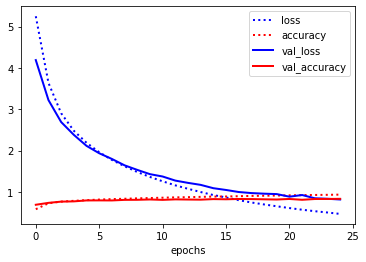

In [24]:
from tensorflow.keras.applications import VGG16
from keras import regularizers
from keras import optimizers

def build_model_4_1():    
    reg = regularizers.l2(0.01)
    
    optimizer = tf.keras.optimizers.Adamax(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Adamax')
    
    # Load VGG16
    conv_base = VGG16(weights='imagenet',
              include_top=False, input_shape = (32,32,3))
    
    # Init base model
    model = models.Sequential()
    model.add(conv_base)
    
    # Unfreeze last X blocks
    # conv_base.trainable = False
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    
    # Build rest of model
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer = reg))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, train=False, epochs=25, batch_size=256)

answer_q_4_1 = """Training without unfreezing is slow and underfits a lot. Model is intended for much higher 
resolution images and is therefore much more complex. Unfreezing layers from the last block is much quicker and creates 
increasingly better embeddings. Not getting this model as good as own model , after much
tries with optimizers/regs I found this to work reasonably well. Val is much lower, and error is high,
probably because the conv layers are not optimized for this data. Unfreezing more is better."""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [63]:
import pickle
import gzip
import pandas as pd
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

# Auto classifier
from gama import GamaClassifier
from gama.logging.GamaReport import GamaReport

# Classifiers
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Side things
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, Normalizer, StandardScaler
from category_encoders import TargetEncoder

def transform_evaluations(df):
    """ The GamaReport was initially developed for use within GAMA tooling.
    For this reason it contains some hard to interpret, useless or internal data.
    For clarity, we filter this out for you.
    """
    df = df.drop(['id', 'length_cummax', 'relative_end', 'n', 'start', 'duration'], axis=1)
    df['length'] = -df['length']
    pd.set_option('display.max_columns', None)
    return df

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    model = load_model_from_file(base_dir, name = "model_4_1", extension='.h5')
    
    # remove last 6 layers, flatten until softmax
    for i in range(0, 2):
        model.pop()
    model.summary()
    
    predict_test = model.predict(X_test)
    predict_train = model.predict(X_train)
    predict_val = model.predict(X_val)
    
    store_embedding(predict_test, 'test')
    store_embedding(predict_train, 'train')
    store_embedding(predict_val, 'val')  
    print("Embeddings stored.")

In [64]:
def find_best_pipeline(find = False, runtime = 60):
    """ Looks for an optimal pipeline with gama, trained on the given embedded training set and 
      evaluated on the supplied embedded validation set. Returns the best pipeline that it finds, 
      or returns a manually set pipeline that was found in a previous gama search.
    """
    if find:
        # Try to load embeddings, otherwise create the embeddings and load them from file
        try:
            X_train_embed = load_embedding('train')
            X_val_embed = load_embedding('val')
        except:
            print('The embeddings could not be loaded and are created from X_train and X_val.')
            store_embeddings()

        # Revert to_categorical to be able to get a single vector that does not give error in pipeline
        y_train_single = np.argmax(y_train, axis=1, out=None)
        y_val_single = np.argmax(y_val, axis=1, out=None)
        
        # Use gama to find best pipeline
        auto_ml = GamaClassifier(max_total_time = runtime, # in seconds
        n_jobs=2,  # one subprocess
        scoring='accuracy',  # metric to optimize for
        keep_analysis_log="pipeline.log",  # name for a log file to record search output in
        )   

        auto_ml.fit(X_train_embed, y_train_single)

        # to check what the best pipelines are
        #report = GamaReport(logfile="pipeline.log")
        #evaluations = transform_evaluations(report.evaluations)
        #print(evaluations.sort_values('accuracy', ascending=False).drop_duplicates(['length']))

        # Now take single pipeline to check how this works
        best, = auto_ml._evaluation_library.n_best(1)
        best_pipeline = auto_ml.model
        #print(auto_ml.model)
        print(best_pipeline)
        best_pipeline.fit(X_train_embed, y_train_single)
        val_score = best_pipeline.score(X_val_embed, y_val_single)
        print("train score: {:.3f}, val score: {:.3f}".format(best.score[0], val_score))

        return best_pipeline
    
    # This would be a return statement with a found pipeline from an earlier gama run, but after this initial run I did not
    # get it to work anymore. This particular pipeline does not work well on current embedding. 
    #return Pipeline(memory=None,
    #     steps=[('4',
    #             TargetEncoder(cols=[], drop_invariant=False,
    #                           handle_missing='value', handle_unknown='value',
    #                           min_samples_leaf=1, return_df=True,
    #                           smoothing=1.0, verbose=0)),
    #            ('3',
    #             SimpleImputer(add_indicator=False, copy=True, fill_value=None, strategy='median',
    #                           verbose=0)),
    #            ('2', StandardScaler(copy=True, with_mean=True, with_std=True)),
    #            ('1', Normalizer(copy=True, norm='l1')),
    #            ('0', GaussianNB(priors=None, var_smoothing=1e-09))],
    #     verbose=False)
    
    # Best overall working classifier from assignment 2
    return svm.SVC(kernel = 'rbf', random_state = 1)

# Create new embeddings to try on new 4.1 model and..
# ..set to true if you want to find a replacement for the false return statement
# gives error :(
# PyEval_EvalFrameEx returned NULL without setting an error
#store_embeddings()
#best_pipeline = find_best_pipeline(True, 30)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_36 (Flatten)         (None, 512)               0         
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________
Embeddings stored.


In [71]:
def generate_pipeline():
    """ Returns an sklearn pipeline.
    """
    # Set to true if you want to use gama again to find best pipeline    
    best_pipeline = find_best_pipeline(False) 
    return best_pipeline    
    
def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
    """
    pipeline.fit(X_train, y_train)
       
    return pipeline.score(X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """       
    # Try to load embeddings, otherwise create the embeddings and load them from file
    try:
        X_train_embed = load_embedding('train')
        X_test_embed = load_embedding('test')
    except:
        print('The embeddings could not be loaded and are created from X_train and X_test.')
        store_embeddings()
        
        X_train_embed = load_embedding('train')
        X_test_embed = load_embedding('test')
        
    # Revert to_categorical to be able to get a single vector that does not give error in pipeline (for example in SVM)
    y_train_single = np.argmax(y_train, axis=1, out=None)
    y_test_single = np.argmax(y_test, axis=1, out=None)
    
    pipeline = generate_pipeline()
    accuracy = evaluate_pipeline(pipeline, X_train_embed, y_train_single, X_test_embed, y_test_single)
    
    return accuracy

#print("Pipeline:",generate_pipeline())
evaluation = evaluation_4_2(X_train, y_train, X_test, y_test)
print("Accuracy on test set is: " + str(evaluation))
answer_q_4_2 = """After preparing X and y so it can be used in any classifier, testing on a basic pipeline,
I implemented gama. I put the best pipeline it found in an early run as a return statement in the 
learner. Unless specified otherwise, this pipeline will be used when evaluation_4_2 is ran. 
However, this stopped working, as gama gives a timout error. I now used svm as backup. The accuracy is fine, given the 
performance of the 4.1 model, but is far away from the performance of section 2."""
print("Answer is {} characters long".format(len(answer_q_4_2)))

The embeddings could not be loaded and are created from X_train and X_test.
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_41 (Flatten)         (None, 512)               0         
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________
Embeddings stored.
Accuracy on test set is: 0.8389062342632692
Answer is 482 characters long
